In [1]:
import torch
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#reading data

df = pd.read_csv('salary_data.csv')

x = df['YearsExperience'].values
y = df['Salary'].values

x = torch.from_numpy(x).float()
y = torch.from_numpy(y).float()

x = x.view(30, -1)
y = y.view(30, -1)

In [3]:
# initializing weight and bias

w = torch.randn(1, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

print(w.shape)
print(b.shape)

torch.Size([1, 1])
torch.Size([1])


In [4]:
# linear regression model

def linreg_model(x):
    return x @ w + b

y_pred = linreg_model(x)

In [5]:
# mean square loss

def calculate_loss(y_true, y_pred):
    diff = y_true - y_pred
    return torch.sum(diff * diff) / diff.numel()

loss = calculate_loss(y, y_pred)
print(loss)

tensor(6.5025e+09, grad_fn=<DivBackward0>)


In [6]:
# hyperparamters

lr = 0.002
epochs = 100

In [7]:
#training loop

loss_hist = []
for epoch in range(epochs):
    y_pred = linreg_model(x)
    loss = calculate_loss(y, y_pred)
    loss.backward()
    loss_hist.append(loss.item())
    with torch.no_grad():
        w -= w.grad * lr
        b -= b.grad * lr
        w.grad.zero_()
        b.grad.zero_()

In [8]:
preds = linreg_model(x)
loss = calculate_loss(preds, y)
print(loss)

tensor(1.3520e+08, grad_fn=<DivBackward0>)


Text(0.5, 1.0, 'Epochs vs Error')

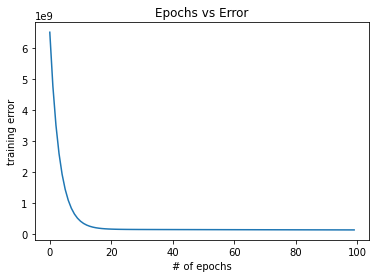

In [9]:
plt.plot(range(epochs), loss_hist)
plt.xlabel("# of epochs")
plt.ylabel("training error")
plt.title("Epochs vs Error")

Text(0, 0.5, 'Salary')

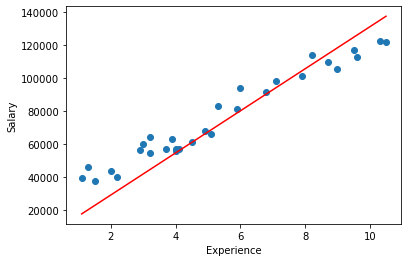

In [12]:
plt.scatter(x, y)
plt.plot(x, y_pred.detach(), 'r')
plt.xlabel('Experience')
plt.ylabel('Salary')